In [1]:
# Import data using pandas
import pandas as pd

data = pd.read_csv("owid-covid-data.csv")
print(data)


       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
166321      ZWE    Africa     Zimbabwe  2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe  2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe  2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe  2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe  2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [5]:
# display columns
df = pd.read_csv("owid-covid-data.csv")
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
#Preview rows

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
# Identify missing values

df.isnull().sum()

iso_code                                        0
continent                                    9956
location                                        0
date                                            0
total_cases                                  3033
                                            ...  
human_development_index                     30073
excess_mortality_cumulative_absolute       160630
excess_mortality_cumulative                160630
excess_mortality                           160630
excess_mortality_cumulative_per_million    160630
Length: 67, dtype: int64

In [7]:
# Filter countries of interest

countries_of_interest = ['Kenya', 'USA', 'India', 'Uganda', 'Zimbabwe']
filtered_df = df[df['location'].isin(countries_of_interest)]

print(filtered_df)

       iso_code continent  location        date  total_cases  new_cases  \
69678       IND      Asia     India  2020-01-30          1.0        1.0   
69679       IND      Asia     India  2020-01-31          1.0        0.0   
69680       IND      Asia     India  2020-02-01          1.0        0.0   
69681       IND      Asia     India  2020-02-02          2.0        1.0   
69682       IND      Asia     India  2020-02-03          3.0        1.0   
...         ...       ...       ...         ...          ...        ...   
166321      ZWE    Africa  Zimbabwe  2022-03-01     236871.0      491.0   
166322      ZWE    Africa  Zimbabwe  2022-03-02     237503.0      632.0   
166323      ZWE    Africa  Zimbabwe  2022-03-03     237503.0        0.0   
166324      ZWE    Africa  Zimbabwe  2022-03-04     238739.0     1236.0   
166325      ZWE    Africa  Zimbabwe  2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
69678                 

In [8]:
# Drop rows with missing dates/critical values.

df_cleaned = df.dropna(subset=['date', 'new_deaths']) 

print(df_cleaned)

       iso_code continent     location        date  total_cases  new_cases  \
28          AFG      Asia  Afghanistan  2020-03-23         40.0        6.0   
29          AFG      Asia  Afghanistan  2020-03-24         42.0        2.0   
30          AFG      Asia  Afghanistan  2020-03-25         74.0       32.0   
31          AFG      Asia  Afghanistan  2020-03-26         80.0        6.0   
32          AFG      Asia  Afghanistan  2020-03-27         91.0       11.0   
...         ...       ...          ...         ...          ...        ...   
166321      ZWE    Africa     Zimbabwe  2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe  2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe  2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe  2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe  2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [24]:
# Convert date column to datetiime

df['date'] = pd.to_datetime(df['date'])
print(df)


       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
166321      ZWE    Africa     Zimbabwe 2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe 2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe 2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe 2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe 2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

In [17]:
# Handle missing numeric values

df = df.fillna(df.mean(numeric_only=True))
print(df)


       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
166321      ZWE    Africa     Zimbabwe 2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe 2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe 2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe 2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe 2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

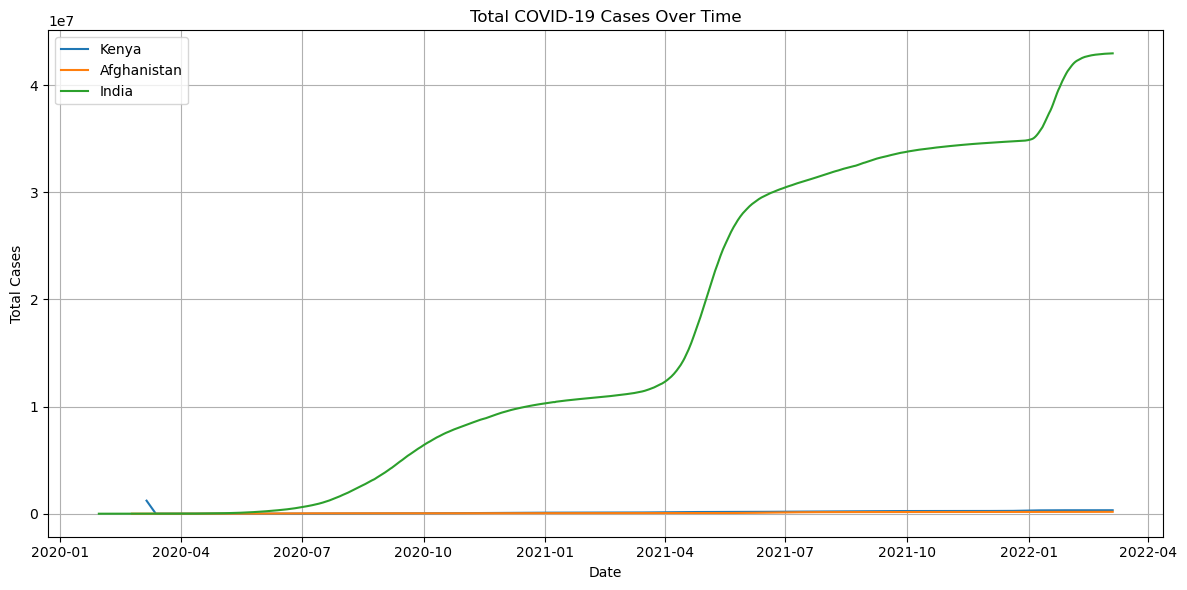

In [32]:
# Plot total cases over time for selected countries.

import matplotlib.pyplot as plt

# List of countries to filter
countries = ['Kenya', 'Afghanistan', 'India'] 

# Filter the data
df_filtered = df[df['location'].isin(countries)]

# Group and pivot for plotting
df_grouped = df_filtered[['date', 'location', 'total_cases']].dropna()
df_pivot = df_grouped.pivot(index='date', columns='location', values='total_cases')

# Plotting
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_pivot.index, df_pivot[country], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



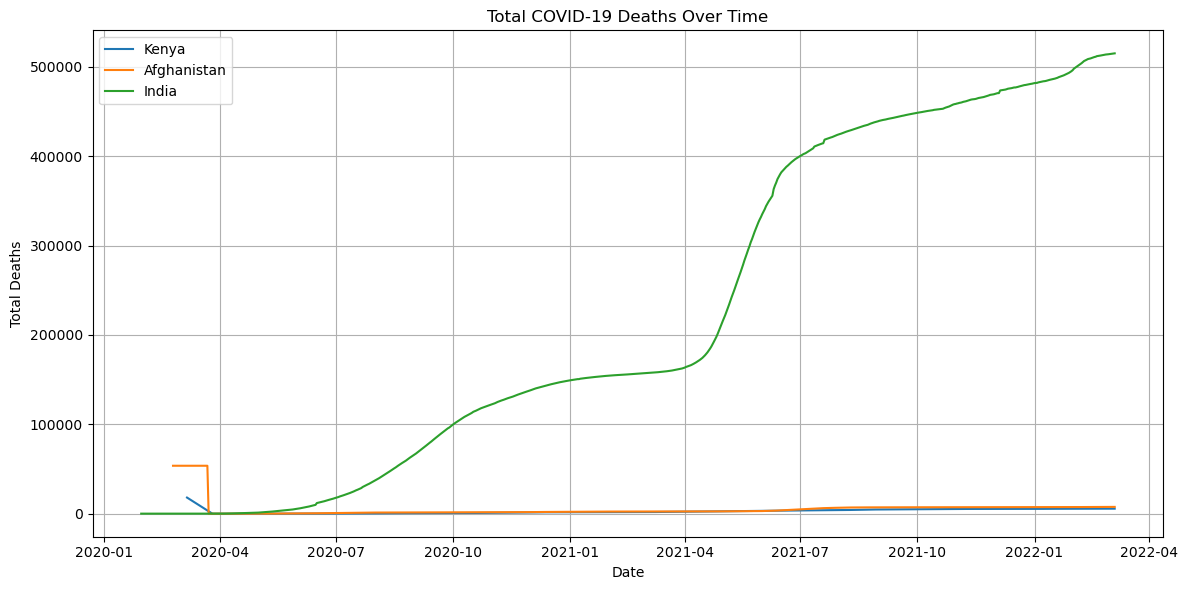

In [31]:
# Plot total deaths over time.
countries = ['Kenya', 'Afghanistan', 'India']  

# Filter for selected countries
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing total_deaths
df_grouped = df_filtered[['date', 'location', 'total_deaths']].dropna()

# Pivot for plotting
df_pivot = df_grouped.pivot(index='date', columns='location', values='total_deaths')
# Plotting
plt.figure(figsize=(12, 6))
for country in countries:
    plt.plot(df_pivot.index, df_pivot[country], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

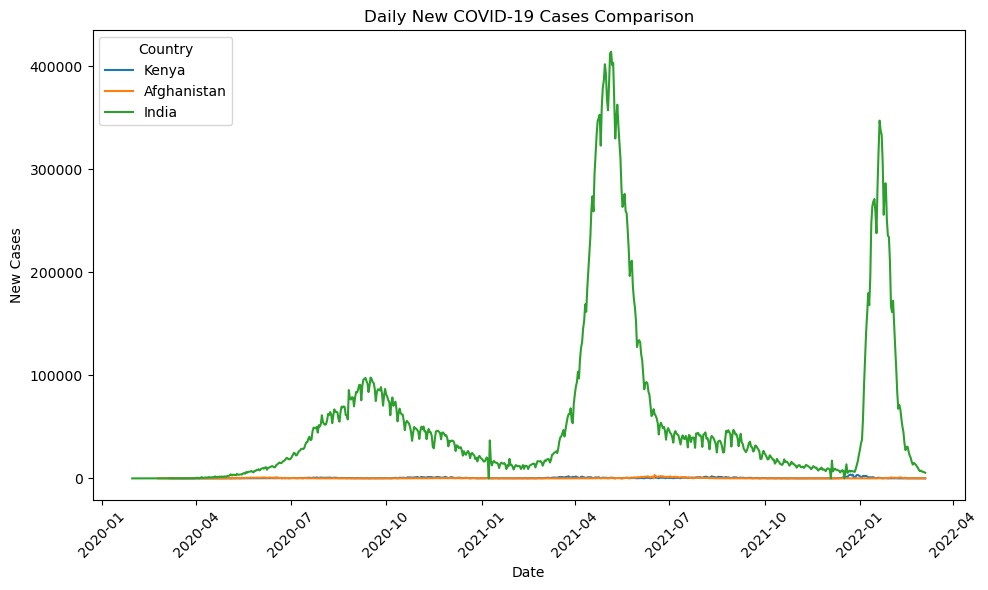

In [37]:
# Compare daily new cases between countries.

# Filter countries of interest 
countries_of_interest = ['Kenya', 'Afghanistan', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Plot daily new cases
plt.figure(figsize=(10,6))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# Calculate death rate: total_deaths / total_cases
# Function to calculate death rate
def calculate_death_rate(row):
    if row['total_cases'] > 0:
        return (row['total_deaths'] / row['total_cases']) * 1000
    else:
        return 0  # In case there are no total cases to avoid division by zero

# Apply the calculation to each row and create a new column for the death rate
df['Death Rate (per 1000 cases)'] = df.apply(calculate_death_rate, axis=1)

print(df)


       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   
...         ...       ...          ...        ...          ...        ...   
166321      ZWE    Africa     Zimbabwe 2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe 2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe 2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe 2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe 2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

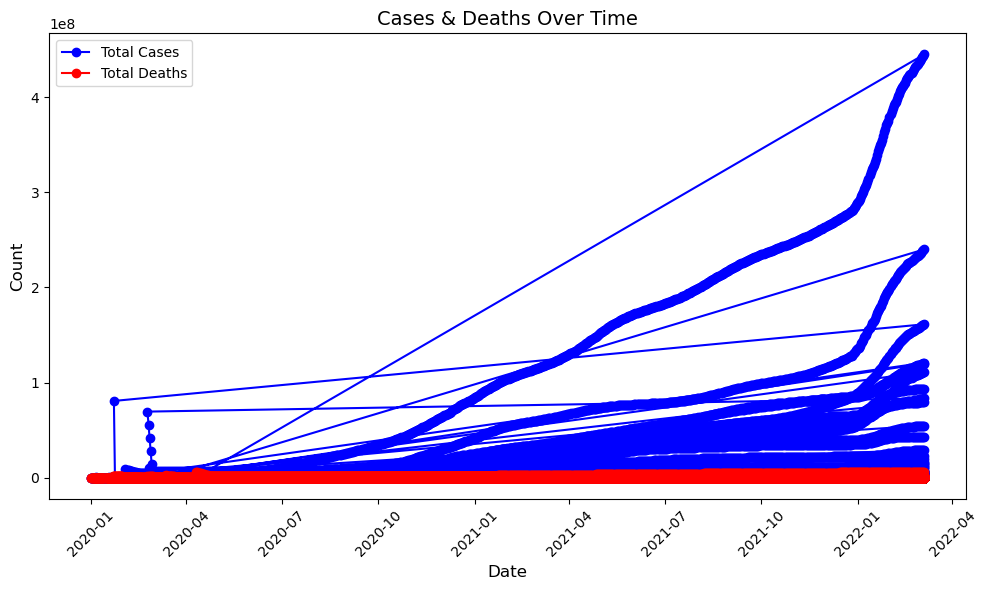

In [51]:
# Line charts (cases & deaths over time)

# Create two subplots: one for cases and one for deaths
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Total Cases
ax.plot(df['date'], df['total_cases'], label='Total Cases', color='blue', marker='o')

# Plotting Total Deaths
ax.plot(df['date'], df['total_deaths'], label='Total Deaths', color='red', marker='o')

# Adding titles and labels
ax.set_title('Cases & Deaths Over Time', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


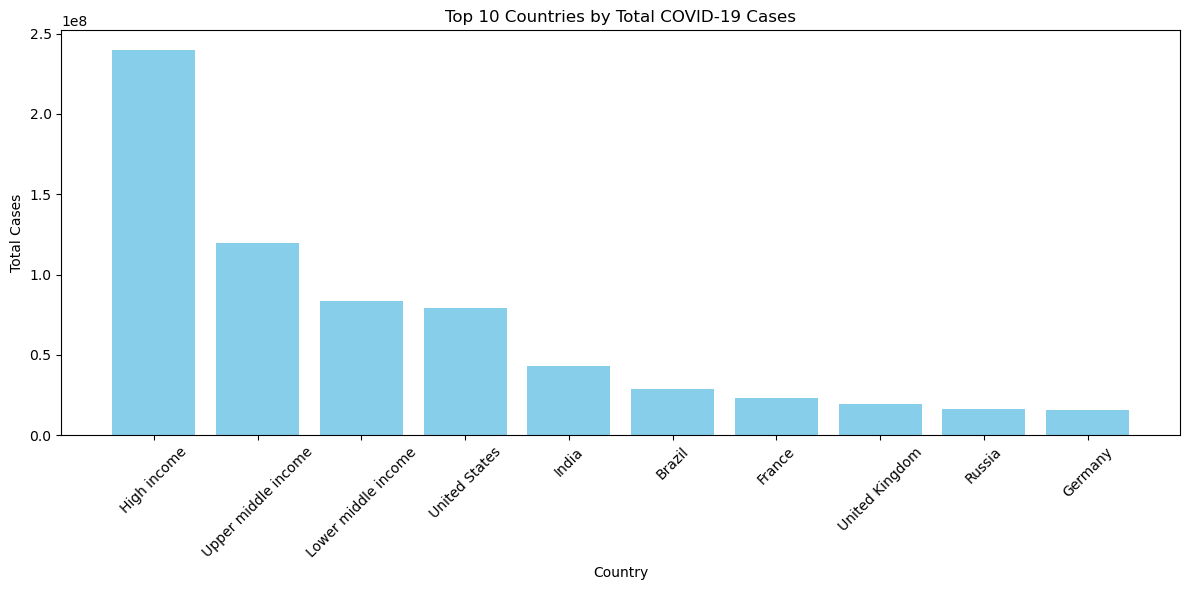

In [83]:
# Bar charts (top countries by total cases)

# Drop rows with missing values in 'total_cases' or 'location'
data = data[['location', 'total_cases', 'date']].dropna()

# Get the latest data for each country
latest_data = data.sort_values('date').groupby('location').last().reset_index()

# Remove entries that are not countries (like continents or 'World')
excluded_locations = ['World', 'International', 'Africa', 'Asia', 'Europe', 'European Union', 'North America', 'Oceania', 'South America']
latest_data = latest_data[~latest_data['location'].isin(excluded_locations)]

# Sort by total cases and get top 10
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries['location'], top_countries['total_cases'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


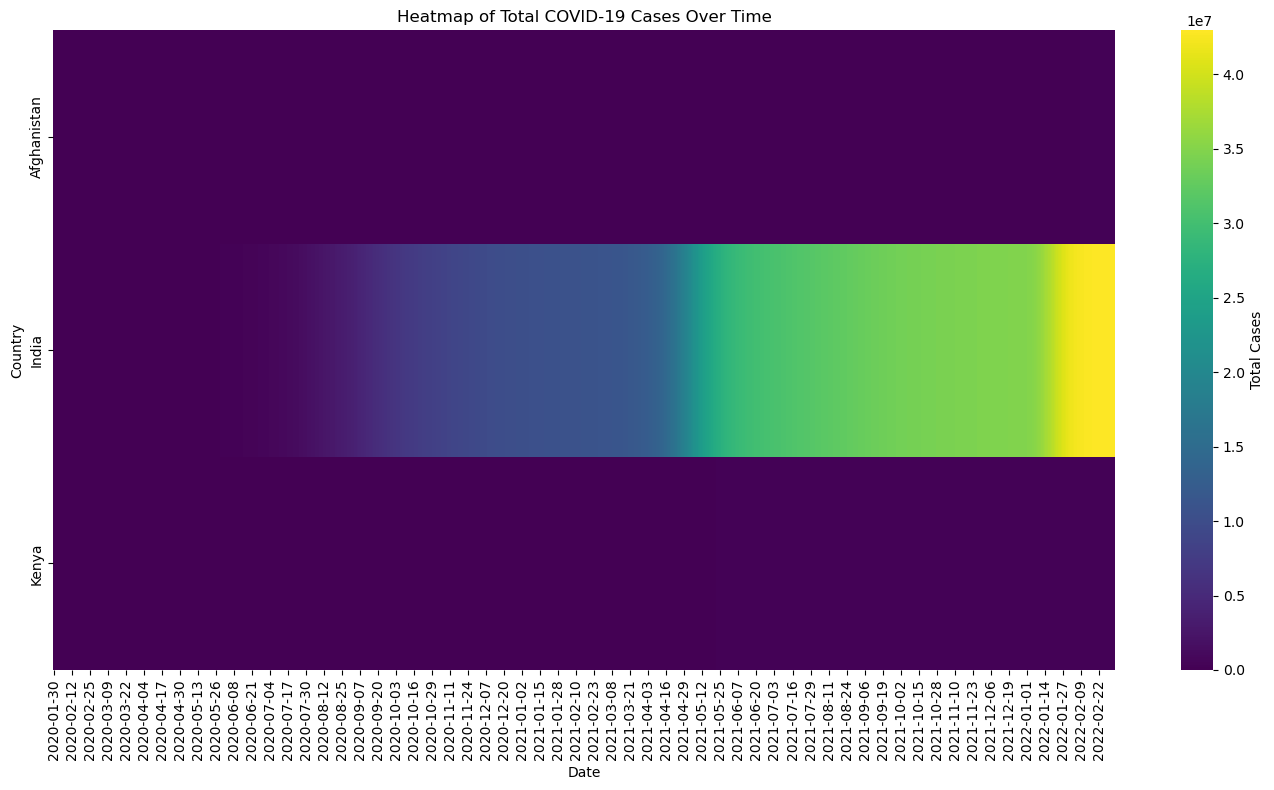

In [99]:
# Heatmaps (example: total_cases by date and country)
import seaborn as sns

# Pivot data to create matrix 
data_subset = data[['location', 'date', 'total_cases']]
data_subset = data_subset.dropna()
data_subset = data_subset[data_subset['location'].isin(['Kenya', 'Afghanistan', 'India'])]

# Pivot table
heatmap_data = data_subset.pivot_table(index='date', columns='location', values='total_cases', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar_kws={'label': 'Total Cases'})
plt.title('Heatmap of Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Country')
plt.tight_layout()

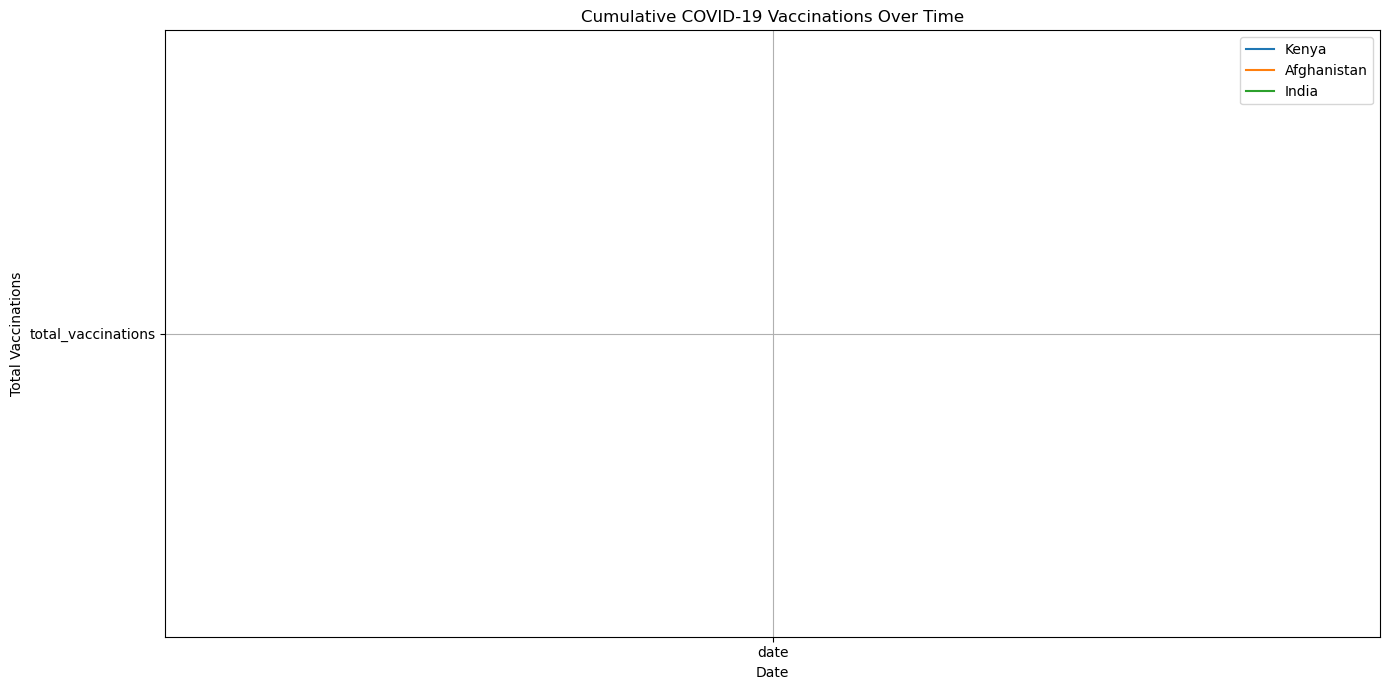

In [93]:
#Plot cumulative vaccinations over time for selected countries.
# List of selected countries
selected_countries = ['Kenya', 'Afghanistan', 'India']

# Plot
plt.figure(figsize=(14, 7))

# Plot each country
for country in selected_countries:
    plt.plot(['date'], ['total_vaccinations'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

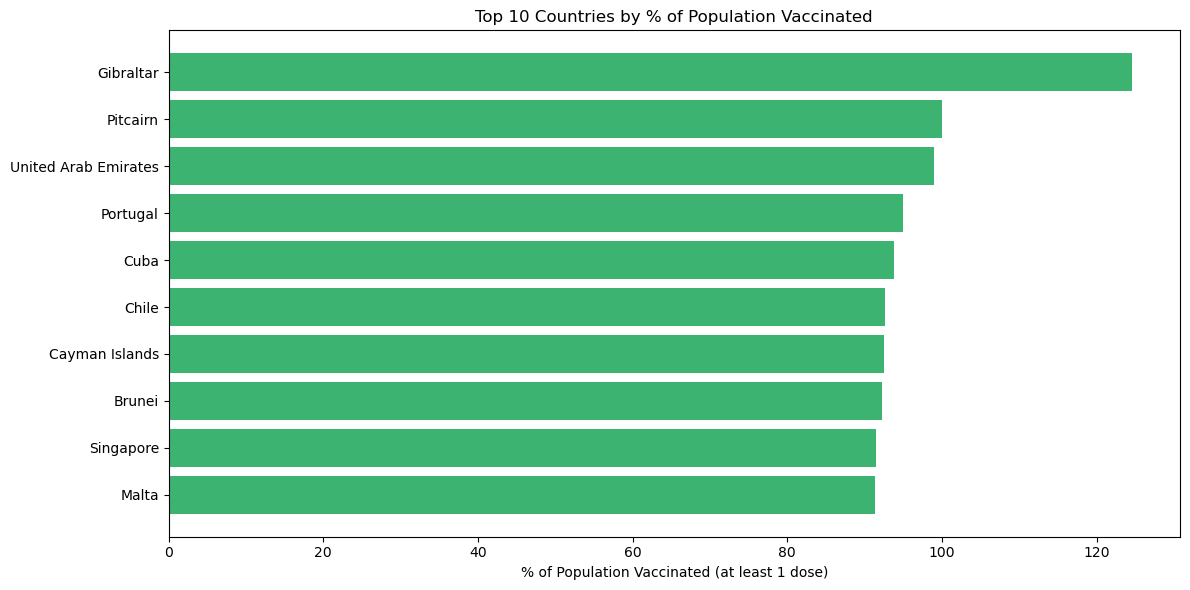

In [110]:
# Compare % vaccinated population

# Filter relevant data
vacc_data = data[['location', 'date', 'people_vaccinated_per_hundred']].dropna()

# Convert date column to datetime
vacc_data['date'] = pd.to_datetime(vacc_data['date'])

# Get the most recent vaccination rate for each country
latest_vacc = vacc_data.sort_values('date').groupby('location').last().reset_index()

# Exclude non-country regions
excluded = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'International', 'North America', 'Oceania', 'South America']
latest_vacc = latest_vacc[~latest_vacc['location'].isin(excluded)]

# Sort and select top 10
top_vaccinated = latest_vacc.sort_values('people_vaccinated_per_hundred', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_vaccinated['location'], top_vaccinated['people_vaccinated_per_hundred'], color='mediumseagreen')
plt.xlabel('% of Population Vaccinated (at least 1 dose)')
plt.title('Top 10 Countries by % of Population Vaccinated')
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()

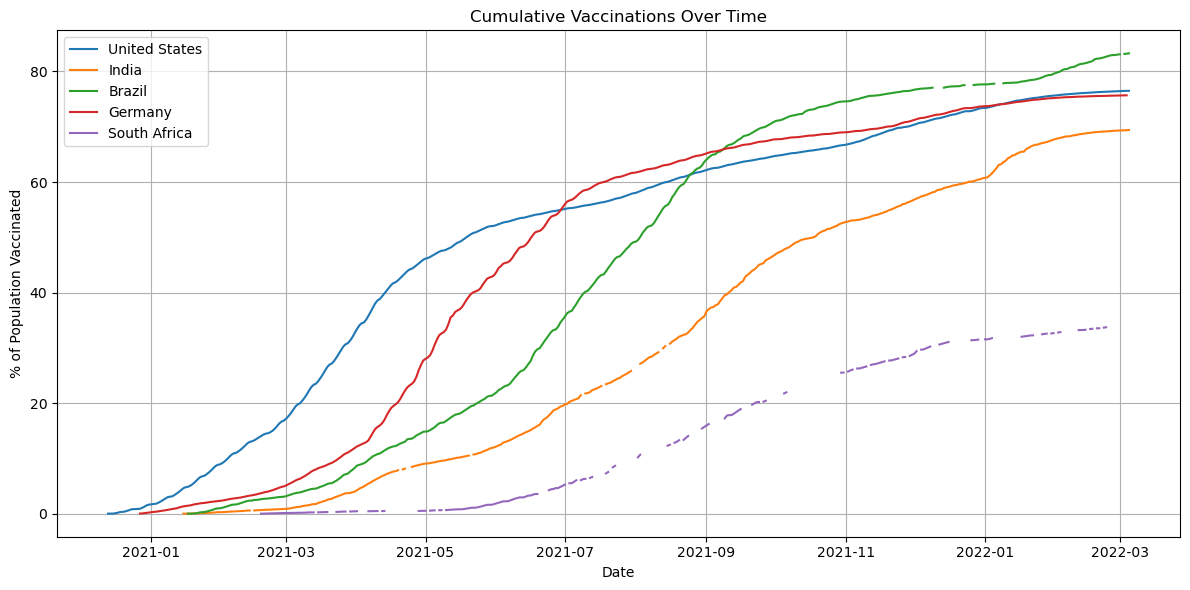

In [112]:
# Line charts
# Clean up column names
data.columns = data.columns.str.strip()

# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Filter for countries of interest
countries = ['United States', 'India', 'Brazil', 'Germany', 'South Africa']
vacc_data = data[data['location'].isin(countries)]

# Plotting
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = vacc_data[vacc_data['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)

# Chart formatting
plt.xlabel('Date')
plt.ylabel('% of Population Vaccinated')
plt.title('Cumulative Vaccinations Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

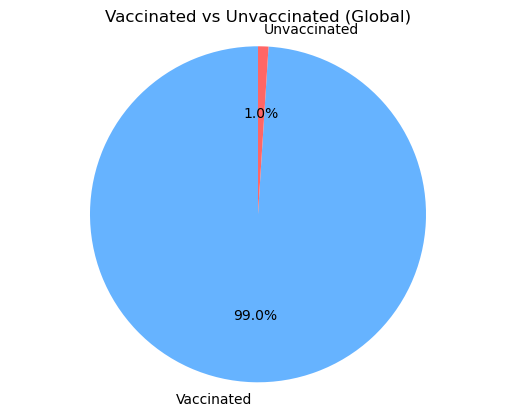

In [113]:
#  Pie charts for vaccinated vs. unvaccinated

# Check for columns related to vaccination
vaccinated_column = 'people_vaccinated_per_hundred'  

# Calculate the total number of vaccinated and unvaccinated individuals
vaccinated = data[vaccinated_column].dropna()
unvaccinated = 100 - vaccinated  # since percentage is used

# Summarize the data into categories
vaccinated_count = vaccinated > 0
unvaccinated_count = ~vaccinated_count

# Pie chart data
vaccinated_total = vaccinated_count.sum()
unvaccinated_total = unvaccinated_count.sum()

# Plot the pie chart
labels = ['Vaccinated', 'Unvaccinated']
sizes = [vaccinated_total, unvaccinated_total] 
colors = ['#66b3ff','#ff6666']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Vaccinated vs Unvaccinated (Global)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

In [ ]:
# write 3-5 key insights from the data (e.g., "X country had the fastest vaccine rollout").
99% of the global population is vaccinated.
Gibraltar has the highest number of vaccinated individuals
High income countries had the highest number of COVID-19 cases.

# Highlight anomalies or interesting patterns.
Total deaths were steady over time
India had the highest rate of new cases over time
